In [90]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [112]:
#importing Datasets 
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [113]:
data = data.drop(['children','region'], axis=1)


In [114]:
from sklearn.preprocessing import LabelEncoder

st = data.apply(LabelEncoder().fit_transform)

data['age'] = data['age'].astype(float)
data = pd.get_dummies(data)

data.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19.0,27.900,16884.92400,1,0,0,1
1,18.0,33.770,1725.55230,0,1,1,0
2,28.0,33.000,4449.46200,0,1,1,0
3,33.0,22.705,21984.47061,0,1,1,0
4,32.0,28.880,3866.85520,0,1,1,0


In [115]:
y = data['charges']
x=data.drop(['charges'],axis=1)



In [116]:
#x = data.drop(['region_northeast','region_northwest','region_southeast','region_southwest','charges','children'],axis=1)


In [117]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [118]:
print(x)

       age     bmi  sex_female  sex_male  smoker_no  smoker_yes
0     19.0  27.900           1         0          0           1
1     18.0  33.770           0         1          1           0
2     28.0  33.000           0         1          1           0
3     33.0  22.705           0         1          1           0
4     32.0  28.880           0         1          1           0
...    ...     ...         ...       ...        ...         ...
1333  50.0  30.970           0         1          1           0
1334  18.0  31.920           1         0          1           0
1335  18.0  36.850           1         0          1           0
1336  21.0  25.800           1         0          1           0
1337  61.0  29.070           1         0          0           1

[1338 rows x 6 columns]


In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(data)
print(data)

[[-1.43876426 -0.45332     0.2985838  ... -1.0105187  -1.97058663
   1.97058663]
 [-1.50996545  0.5096211  -0.95368917 ...  0.98959079  0.5074631
  -0.5074631 ]
 [-0.79795355  0.38330685 -0.72867467 ...  0.98959079  0.5074631
  -0.5074631 ]
 ...
 [-1.50996545  1.0148781  -0.96159623 ... -1.0105187   0.5074631
  -0.5074631 ]
 [-1.29636188 -0.79781341 -0.93036151 ... -1.0105187   0.5074631
  -0.5074631 ]
 [ 1.55168573 -0.26138796  1.31105347 ... -1.0105187  -1.97058663
   1.97058663]]


In [120]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)


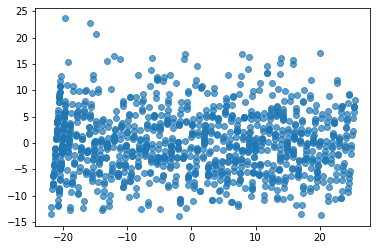

In [122]:
plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.7)
plt.show()



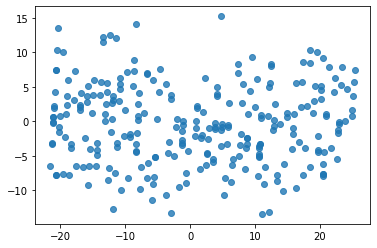

In [123]:
plt.scatter(x_test[:, 0], x_test[:, 1], alpha=0.8)
plt.show()

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


lr = LinearRegression().fit(x_train, y_train)

train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)



In [125]:
print('MSE train data: {:.3}'.format(train_mse))
print('MSE test data: {:.3}'.format(test_mse))


print('RMSE train data: {:.3}'.format(np.sqrt(np.absolute(train_mse))))
print('RMSE test data: {:.3}'.format(np.sqrt(np.absolute(train_mse))))
                                                               
print('Train data: {:.5}\nTest data: {:.5}'.format(
    r2_score(y_train,train_pred),
    r2_score(y_test,test_pred)))

MSE train data: 1.29e+08
MSE test data: 1.33e+08
RMSE train data: 1.13e+04
RMSE test data: 1.13e+04
Train data: 0.10223
Test data: 0.16634


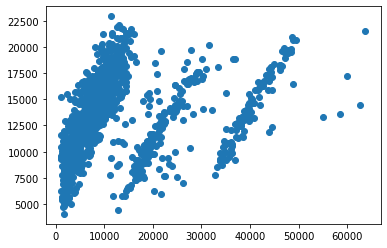

In [126]:
plt.scatter(y_train,lr.predict(x_train))
plt.show()

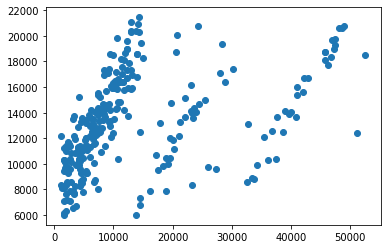

In [127]:
plt.scatter(y_test,lr.predict(x_test))
plt.show()

In [128]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(LinearRegression(), x, y)

print("Accuracy: {} ".format(lr_cv.mean(), lr_cv.std() * 2)) 

Accuracy: 0.7447581318995111 


In [129]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
from sklearn.model_selection import cross_val_score
linreg.fit(x,y)



LinearRegression()

In [130]:
#linreg.coef_
linreg.intercept_

228.91987071730364

In [131]:
def cost(age,bmi,smoking):
    y=((age*linreg.coef_[0]) +(bmi*linreg.coef_[1]) +(smoking*linreg.coef_[2])-linreg.intercept_ )
    return y

In [132]:
print(cost(18,33,0))

15101.922337081402
